In [53]:
# IV for a double dot

import numpy as np
import imp
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append(os.path.expanduser('~/quantum-ml/nanowire_model'))

import potential_profile
import markov
imp.reload(markov)
import thomas_fermi
imp.reload(thomas_fermi)
import tunneling
imp.reload(tunneling)
import exceptions

def get_dot_current_and_charge(physics_model,graph_model,tf_strategy):
    
    try:
        graph = markov.Markov(graph_model,physics_model,tf_strategy)
        graph.generate_graph()

        current = graph.get_current()
        charge_state = graph.get_charge_state()

        del graph
    except exceptions.InvalidChargeState:
        current = 0
        # no dot
        charge_state = (0,0)
    
    return current,charge_state

2.1995095662e-17 (3, 4)


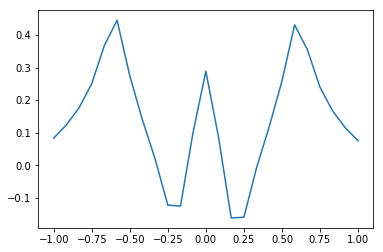

In [118]:
# physical parameters
E_scale = 'eV'
dx_scale = '1e-9'

kT = 1000e-6
b1 = (-200e-3,-0.6,0.05,1)
d1 = (200e-3,-0.2,0.05,1)
b2 = (-250e-3,0.0,0.05,1)
d2 = (220e-3,0.2,0.05,1)
b3 = (-200e-3,0.6,0.05,1)

x = np.linspace(-1,1,25)
V = potential_profile.V_x_wire(x,[b1,b2,b3,d1,d2])

K_onsite = 10e-3
sigma = x[1] - x[0]
x_0 = 0.1*(x[1] - x[0])
mu_l = (200.0e-3,200.1e-3)
battery_weight = 100

physics_model = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)

# graph parameters
graph_model = (5,1)

tf_strategy = 'simple'

plt.plot(x,V)


I,charge_state = get_dot_current_and_charge(physics_model,graph_model,tf_strategy)
print(I,charge_state)

In [ ]:
N_v = 50
V_d_vec = np.linspace(180e-3,220e-3,N_v)
I_vec = np.zeros((N_v,N_v))
charge_state_vec = []

for i in range(N_v):
    print(i)
    charge_state_row = []
    for j in range(N_v):
        #print("j",j)
        b1 = (-200e-3,-0.6,0.05,1)
        d1 = (V_d_vec[i],-0.2,0.05,1)
        b2 = (-250e-3,0.0,0.05,1)
        d2 = (V_d_vec[j],0.2,0.05,1)
        b3 = (-200e-3,0.6,0.05,1)

        V = potential_profile.V_x_wire(x,[b1,b2,b3,d1,d2])
        
        physics_model = (E_scale,dx_scale,kT,x,V,K_onsite,sigma,x_0,mu_l,battery_weight)
        I,charge_state = get_dot_current_and_charge(physics_model,graph_model,tf_strategy)
        I_vec[i,j] = I
        charge_state_row += [charge_state]
    charge_state_vec += [charge_state_row]
        

0


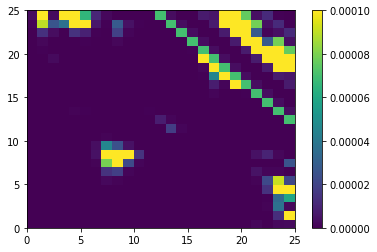

In [86]:
plt.pcolor(I_vec,vmin=0,vmax=1e-4)
plt.colorbar()

In [67]:
cs = np.array(charge_state_vec)

In [91]:
size = 18
d1_charge = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        d1_charge[i,j] = cs[i,j][0]
d2_charge = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        d2_charge[i,j] = cs[i,j][0]


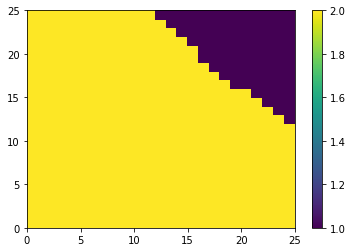

In [107]:
size = 25
dot_size = np.zeros((size,size))
for i in range(size):
    for j in range(size):
       dot_size[i,j] = len(cs[i,j])
plt.pcolor(dot_size)
plt.colorbar()


(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(3,)
(3,)
(3,)
(4,)
(4,)
(4,)
(4,)


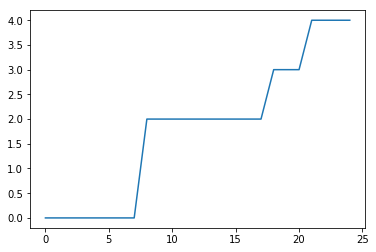

In [98]:
trace = np.zeros(cs.shape[0])
for i in range(cs.shape[0]):
    trace[i] = np.sum(np.array(cs[i,i]))
    print(cs[i,i])
plt.plot(trace)
    